In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import time
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

In [23]:
# 29.10 11:00-12:30 Користејќи Selenium соберете ги сите цитати достапни на https://quotes.toscrape.com/scroll заедно со таговите и авторот. 
#Внимавајте соодветно да се справите со scrolling низ страницата. 
#На крај, визуелизирајте ја распределбата на цитати по 10-те најпопуларни тагови.

In [24]:
# 1. Open website
driver = Chrome()
driver.get("https://quotes.toscrape.com/scroll")

In [25]:
# 2. Scroll until all quotes are loaded
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [26]:
# 3️. Collect all quote elements
quote_elements = driver.find_elements(By.CLASS_NAME, "quote")
data = []
for q in quote_elements:
    html = q.get_attribute("outerHTML")
    soup = BeautifulSoup(html, "html.parser")
    text = soup.select_one(".text").get_text(strip=True)
    author = soup.select_one(".author").get_text(strip=True)
    tags = [t.get_text(strip=True) for t in soup.select(".tag")]
    data.append({"text": text, "author": author, "tags": tags})

print(f"Extracted {len(data)} quotes.")
driver.quit()  # Close cleanly after extraction

Extracted 40 quotes.


In [27]:
# 4. DataFrame
df = pd.DataFrame(data)
print(df.head())

                                                text           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                             tags  
0        [change, deep-thoughts, thinking, world]  
1                            [abilities, choices]  
2  [inspirational, life, live, miracle, miracles]  
3              [aliteracy, books, classic, humor]  
4                    [be-yourself, inspirational]  


In [28]:
# 5. Analyze tag frequency
all_tags = [tag for tags_list in df["tags"] for tag in tags_list]
tag_counts = pd.Series(all_tags).value_counts().head(10)

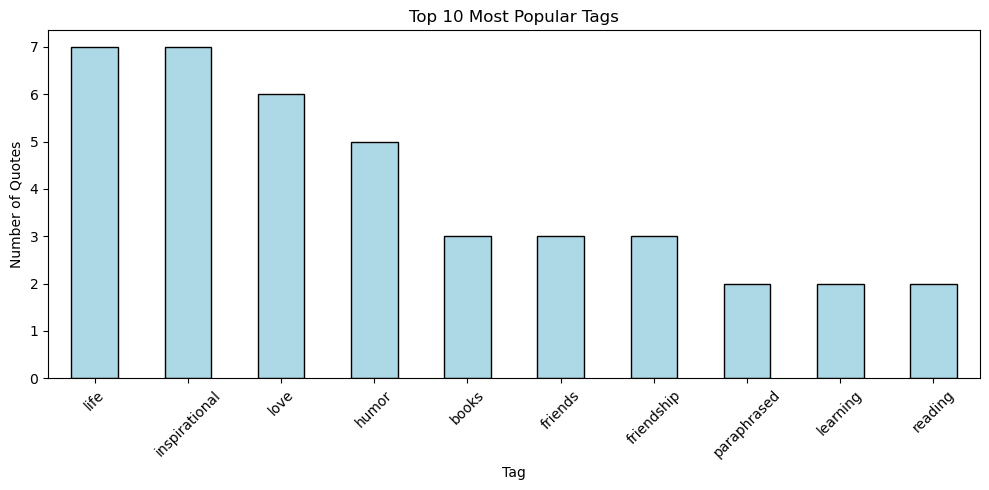

In [29]:
# 6. Plot
plt.figure(figsize=(10, 5))
tag_counts.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Top 10 Most Popular Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Quotes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# # # 30.10 8-9:30 Користејќи Selenium прикажете ги првите четири книги од првите пет категории од страната https://books.toscrape.com.

In [31]:
# ✅ 1. Setup Chrome
options = Options()
options.add_argument("--start-maximized")
service = Service()  # or Service("C:/path/to/chromedriver.exe") if needed
driver = webdriver.Chrome(service=service, options=options)

In [32]:
# ✅ 2. Open main page
driver.get("https://books.toscrape.com/")
time.sleep(2)

In [36]:
# ✅ 3. Extract category names & links (store them as strings, not elements)
category_elements = driver.find_elements(By.CSS_SELECTOR, ".side_categories ul li ul li a")[:5]
categories = []
for cat in category_elements:
    name = cat.text.strip()
    link = cat.get_attribute("href")
    categories.append({"name": name, "link": link})

category_data = []

In [37]:

# ✅ 4. Visit each category and scrape first 4 books
for cat in categories:
    driver.get(cat["link"])
    time.sleep(2)
    books = driver.find_elements(By.CSS_SELECTOR, "article.product_pod")[:4]

    for book in books:
        title = book.find_element(By.CSS_SELECTOR, "h3 a").get_attribute("title")
        price = book.find_element(By.CSS_SELECTOR, ".price_color").text
        img = book.find_element(By.CSS_SELECTOR, "img").get_attribute("src")

        category_data.append({
            "Category": cat["name"],
            "Title": title,
            "Price": price,
            "Image": img
        })

driver.quit()

In [38]:
# ✅ 5. Make DataFrame
df = pd.DataFrame(category_data)
print(df)

              Category                                              Title  \
0               Travel                            It's Only the Himalayas   
1               Travel  Full Moon over Noah’s Ark: An Odyssey to Mount...   
2               Travel  See America: A Celebration of Our National Par...   
3               Travel  Vagabonding: An Uncommon Guide to the Art of L...   
4              Mystery                                      Sharp Objects   
5              Mystery                               In a Dark, Dark Wood   
6              Mystery                                The Past Never Ends   
7              Mystery                                   A Murder in Time   
8   Historical Fiction                                 Tipping the Velvet   
9   Historical Fiction  Forever and Forever: The Courtship of Henry Lo...   
10  Historical Fiction            A Flight of Arrows (The Pathfinders #2)   
11  Historical Fiction                              The House by the Lake   

In [39]:
# ✅ 6. Save if needed
df.to_csv("first4books_first5categories.csv", index=False)
print("✅ Data saved successfully.")

✅ Data saved successfully.


In [54]:
#### 29.10 9;30-11 Користејќи Selenium соберете ги податоците за сите филмови достапни на страницата 
#    https://www.scrapethissite.com/pages/ajax-javascript/ по години. 
# Потоа, визуелизирајте ја распределбата на филмови по години.


In [58]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# 1️⃣ Setup Chrome
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 2️⃣ Open the page
driver.get("https://www.scrapethissite.com/pages/ajax-javascript/")
time.sleep(2)

# 3️⃣ Click "Load more" until all movies are loaded
prev_count = 0
while True:
    movies = driver.find_elements(By.CLASS_NAME, "movie")
    curr_count = len(movies)

    if curr_count == prev_count:
        break  # no new movies loaded

    prev_count = curr_count

    try:
        load_more = driver.find_element(By.ID, "load-more")
        if load_more.is_displayed():
            load_more.click()
            # wait until more movies appear
            WebDriverWait(driver, 10).until(
                lambda d: len(d.find_elements(By.CLASS_NAME, "movie")) > curr_count
            )
            time.sleep(0.5)
        else:
            break
    except:
        break

# 4️⃣ Scrape movie data
movies = driver.find_elements(By.CLASS_NAME, "movie")
data = []

for movie in movies:
    try:
        title = movie.find_element(By.CLASS_NAME, "movie-title").text.strip()
        year = int(movie.find_element(By.CLASS_NAME, "movie-year").text.strip())
        rating = float(movie.find_element(By.CLASS_NAME, "movie-rating").text.strip())
        data.append({"Title": title, "Year": year, "Rating": rating})
    except Exception as e:
        print("Skipping a movie due to error:", e)

driver.quit()

# 5️⃣ Create DataFrame
df = pd.DataFrame(data)
print(df.head(), "\nTotal movies:", len(df))

# 6️⃣ Visualize number of movies per year
if not df.empty:
    movie_count = df["Year"].value_counts().sort_index()

    plt.figure(figsize=(10,5))
    plt.bar(movie_count.index, movie_count.values)
    plt.title("Распределба на филмови по години")
    plt.xlabel("Година")
    plt.ylabel("Број на филмови")
    plt.show()
else:
    print("⚠️ No movies were scraped.")


Empty DataFrame
Columns: []
Index: [] 
Total movies: 0
⚠️ No movies were scraped.


In [59]:
# [Main Part] Laboratory exercise 1 - Group A and Group B (29.10.2025 08:00 - 09:30)
#### Користејќи Selenium соберете ги податоците за сите книги што се достапни на страницата https://books.toscrape.com/. 
###Односно, за секоја книга навигирајте се до страницата на којашто се прикажани сите детали за книгата и извлечете ги сите достапни податоци. 
##Исто така, соодветно справете се со страничењето со цел да ги извлечете податоците за сите 1000 книги. 
###На крај, пресметајте дескриптивни статистики за достапноста на книгите.

Catalogue page 1/50 done...
Catalogue page 2/50 done...
Catalogue page 3/50 done...
Catalogue page 4/50 done...
Catalogue page 5/50 done...
Catalogue page 6/50 done...
Catalogue page 7/50 done...
Catalogue page 8/50 done...
Catalogue page 9/50 done...
Catalogue page 10/50 done...
Catalogue page 11/50 done...
Catalogue page 12/50 done...
Catalogue page 13/50 done...
Catalogue page 14/50 done...
Catalogue page 15/50 done...
Catalogue page 16/50 done...
Catalogue page 17/50 done...
Catalogue page 18/50 done...
Catalogue page 19/50 done...
Catalogue page 20/50 done...
Catalogue page 21/50 done...
Catalogue page 22/50 done...
Catalogue page 23/50 done...
Catalogue page 24/50 done...
Catalogue page 25/50 done...
Catalogue page 26/50 done...
Catalogue page 27/50 done...
Catalogue page 28/50 done...
Catalogue page 29/50 done...
Catalogue page 30/50 done...
Catalogue page 31/50 done...
Catalogue page 32/50 done...
Catalogue page 33/50 done...
Catalogue page 34/50 done...
Catalogue page 35/50 do

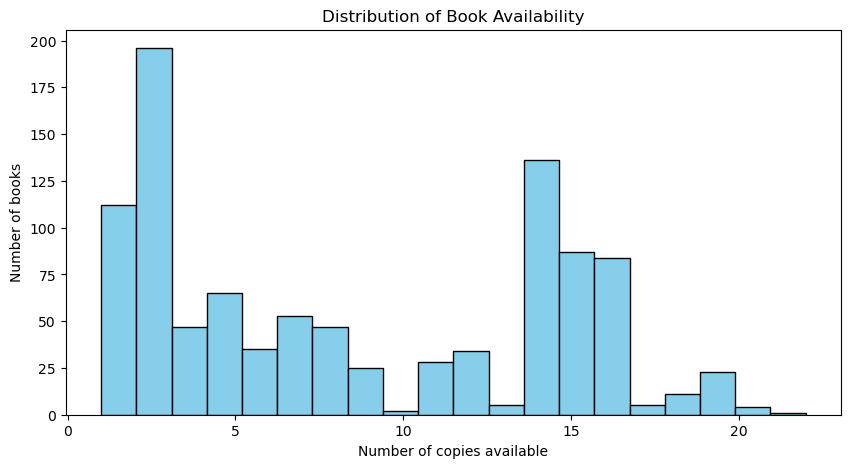

In [63]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import time

# -------------------------
# 1️⃣ Setup Selenium
# -------------------------
options = Options()
options.add_argument("--headless")  # run in background
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

all_books = []

# -------------------------
# 2️⃣ Scrape catalogue pages (titles, prices, links)
# -------------------------
start_time = time.time()
for page in range(1, 51):  # 50 pages
    driver.get(f"https://books.toscrape.com/catalogue/page-{page}.html")
    books = driver.find_elements(By.CLASS_NAME, "product_pod")
    
    for book in books:
        title = book.find_element(By.TAG_NAME, "h3").text
        price = book.find_element(By.CLASS_NAME, "price_color").text
        link = book.find_element(By.TAG_NAME, "h3").find_element(By.TAG_NAME, "a").get_attribute("href")
        all_books.append({"Title": title, "Price": price, "Link": link})
    print(f"Catalogue page {page}/50 done...")

driver.quit()
print(f"Collected {len(all_books)} book links in {time.time() - start_time:.1f} seconds.")

# -------------------------
# 3️⃣ Fetch availability from detail pages using multithreading
# -------------------------
def fetch_availability(book):
    try:
        res = requests.get(book["Link"], timeout=5)
        soup = BeautifulSoup(res.text, "html.parser")
        avail_text = soup.select("table.table tr:nth-child(6) td")[0].text.strip()
        match = re.search(r"\((\d+) available\)", avail_text)
        book["Availability_num"] = int(match.group(1)) if match else 0
    except Exception as e:
        book["Availability_num"] = 0
    return book

print("Fetching availability for all books...")
with ThreadPoolExecutor(max_workers=10) as executor:  # 10 parallel threads
    all_books = list(executor.map(fetch_availability, all_books))

# -------------------------
# 4️⃣ Create DataFrame
# -------------------------
df = pd.DataFrame(all_books)
print(df.head())
print(f"Total books: {len(df)}")

# -------------------------
# 5️⃣ Descriptive statistics
# -------------------------
print("\nAvailability statistics:")
print(df["Availability_num"].describe())

# -------------------------
# 6️⃣ Plot distribution of availability
# -------------------------
plt.figure(figsize=(10,5))
plt.hist(df["Availability_num"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Book Availability")
plt.xlabel("Number of copies available")
plt.ylabel("Number of books")
plt.show()


In [ ]:
# Main Part] Laboratory exercise 1 - Group A and Group B (29.10.2025 09:30 - 11:00)

# Користејќи Selenium соберете ги податоците за сите филмови достапни на страницата https://www.scrapethissite.com/pages/ajax-javascript/ по години.
# Потоа, визуелизирајте ја распределбата на филмови по години.

Пронајдени се 6 години
Собирање на податоци за година: 2015
  Собрани 16 филмови
Собирање на податоци за година: 2014
  Собрани 16 филмови
Собирање на податоци за година: 2013
  Собрани 12 филмови
Собирање на податоци за година: 2012
  Собрани 15 филмови
Собирање на податоци за година: 2011
  Собрани 15 филмови
Собирање на податоци за година: 2010
  Собрани 13 филмови

Вкупно собрани филмови: 87

Првите 10 филмови:
   year               title  nominations  awards  best_picture
0  2015           Spotlight            6       2          True
1  2015  Mad Max: Fury Road           10       6         False
2  2015        The Revenant           12       3         False
3  2015     Bridge of Spies            6       1         False
4  2015       The Big Short            5       1         False
5  2015     The Danish Girl            4       1         False
6  2015                Room            4       1         False
7  2015          Ex Machina            2       1         False
8  2015   The 

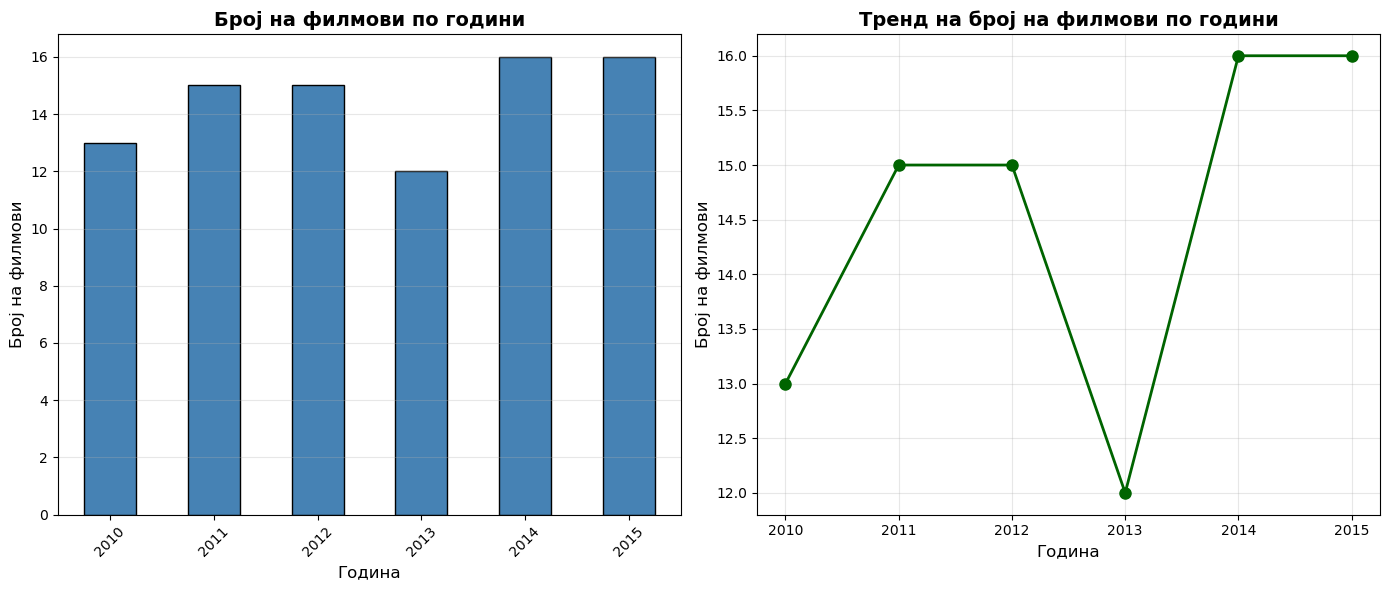


=== Статистика ===
Вкупно филмови: 87
Година со најмногу филмови: 2014 (16 филмови)
Година со најмалку филмови: 2013 (12 филмови)
Просечен број на филмови по година: 14.50

=== Распределба по години ===
year
2010    13
2011    15
2012    15
2013    12
2014    16
2015    16
Name: count, dtype: int64

Филмови со Best Picture награда: 6

Податоците се зачувани во 'oscar_movies.csv'


In [68]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd
import matplotlib.pyplot as plt
import time

# Подесување на Chrome опции
chrome_options = Options()
chrome_options.add_argument('--headless')  # Работи без да се отвори прозорец
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Иницијализација на веб драјвер
driver = webdriver.Chrome(options=chrome_options)

try:
    # Отворање на страницата
    url = "https://www.scrapethissite.com/pages/ajax-javascript/"
    driver.get(url)
    
    # Чекаме страницата да се вчита
    wait = WebDriverWait(driver, 10)
    
    # Податочна структура за чување на филмовите
    all_movies = []
    
    # Наоѓаме ги сите копчиња за години
    year_buttons = wait.until(EC.presence_of_all_elements_located(
        (By.CSS_SELECTOR, "a.year-link")
    ))
    
    print(f"Пронајдени се {len(year_buttons)} години")
    
    # Итерираме низ секоја година
    for i in range(len(year_buttons)):
        # Повторно наоѓаме ги копчињата (за да избегнеме stale element)
        year_buttons = driver.find_elements(By.CSS_SELECTOR, "a.year-link")
        year_button = year_buttons[i]
        year = year_button.text.strip()
        
        print(f"Собирање на податоци за година: {year}")
        
        # Кликнуваме на годината
        year_button.click()
        time.sleep(2)  # Зголемено време за чекање на AJAX
        
        # Наоѓаме ги филмовите за оваа година
        movies = wait.until(EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "tr.film")
        ))
        
        for movie in movies:
            try:
                title = movie.find_element(By.CSS_SELECTOR, "td.film-title").text.strip()
                nominations = movie.find_element(By.CSS_SELECTOR, "td.film-nominations").text.strip()
                awards = movie.find_element(By.CSS_SELECTOR, "td.film-awards").text.strip()
                
                # Проверка дали постои икона за Best Picture (опционално)
                best_picture = False
                try:
                    movie.find_element(By.CSS_SELECTOR, "td.film-best-picture i")
                    best_picture = True
                except:
                    pass
                
                movie_data = {
                    'year': int(year),
                    'title': title,
                    'nominations': int(nominations) if nominations else 0,
                    'awards': int(awards) if awards else 0,
                    'best_picture': best_picture
                }
                all_movies.append(movie_data)
            except Exception as e:
                print(f"Грешка при обработка на филм: {e}")
                continue
        
        print(f"  Собрани {len(movies)} филмови")
    
    print(f"\nВкупно собрани филмови: {len(all_movies)}")
    
finally:
    driver.quit()

# Креирање на DataFrame
df = pd.DataFrame(all_movies)

# Прикажување на првите редови
print("\nПрвите 10 филмови:")
print(df.head(10))

print("\nОсновни информации:")
print(df.info())

# Визуелизација на распределбата на филмови по години
plt.figure(figsize=(14, 6))

# Пребројување на филмови по години
movies_per_year = df['year'].value_counts().sort_index()

# Барплот
plt.subplot(1, 2, 1)
movies_per_year.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Број на филмови по години', fontsize=14, fontweight='bold')
plt.xlabel('Година', fontsize=12)
plt.ylabel('Број на филмови', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Линиски график
plt.subplot(1, 2, 2)
movies_per_year.plot(kind='line', marker='o', color='darkgreen', linewidth=2, markersize=8)
plt.title('Тренд на број на филмови по години', fontsize=14, fontweight='bold')
plt.xlabel('Година', fontsize=12)
plt.ylabel('Број на филмови', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнителна статистика
print("\n=== Статистика ===")
print(f"Вкупно филмови: {len(df)}")
print(f"Година со најмногу филмови: {movies_per_year.idxmax()} ({movies_per_year.max()} филмови)")
print(f"Година со најмалку филмови: {movies_per_year.idxmin()} ({movies_per_year.min()} филмови)")
print(f"Просечен број на филмови по година: {movies_per_year.mean():.2f}")

# Детална табела по години
print("\n=== Распределба по години ===")
print(movies_per_year)

# Филмови со Best Picture награда
best_picture_movies = df[df['best_picture'] == True]
print(f"\nФилмови со Best Picture награда: {len(best_picture_movies)}")

# Зачувување на податоците во CSV
df.to_csv('oscar_movies.csv', index=False, encoding='utf-8')
print("\nПодатоците се зачувани во 'oscar_movies.csv'")

In [ ]:
##### 27.10 12:30-14;00 
# Користејќи Selenium соберете ги податоците за сите книги што се достапни на страницата https://books.toscrape.com/ по категории. Потоа, визуелизирајте ја распределбата на книги по категории.
#### Насоки: Прво извлечете ги сите категории достапни на страницата заедно со линковите што водат до соодветната страна за секоја категорија. 
#####Потоа, искористете ги линковите за да се навигирате до страницата за секоја категорија. 
####На крај, справете со страничењето на секоја страница за да ги соберете сите книги. Потоа, визуелизирајте ја распределбата.


Found 50 categories.
Scraping category: Travel
  => Travel: 11 books
Scraping category: Mystery
  => Mystery: 32 books
Scraping category: Historical Fiction
  => Historical Fiction: 26 books
Scraping category: Sequential Art
  => Sequential Art: 75 books
Scraping category: Classics
  => Classics: 19 books
Scraping category: Philosophy
  => Philosophy: 11 books
Scraping category: Romance
  => Romance: 35 books
Scraping category: Womens Fiction
  => Womens Fiction: 17 books
Scraping category: Fiction
  => Fiction: 65 books
Scraping category: Childrens
  => Childrens: 29 books
Scraping category: Religion
  => Religion: 7 books
Scraping category: Nonfiction
  => Nonfiction: 110 books
Scraping category: Music
  => Music: 13 books
Scraping category: Default
  => Default: 152 books
Scraping category: Science Fiction
  => Science Fiction: 16 books
Scraping category: Sports and Games
  => Sports and Games: 5 books
Scraping category: Add a comment
  => Add a comment: 67 books
Scraping category: 

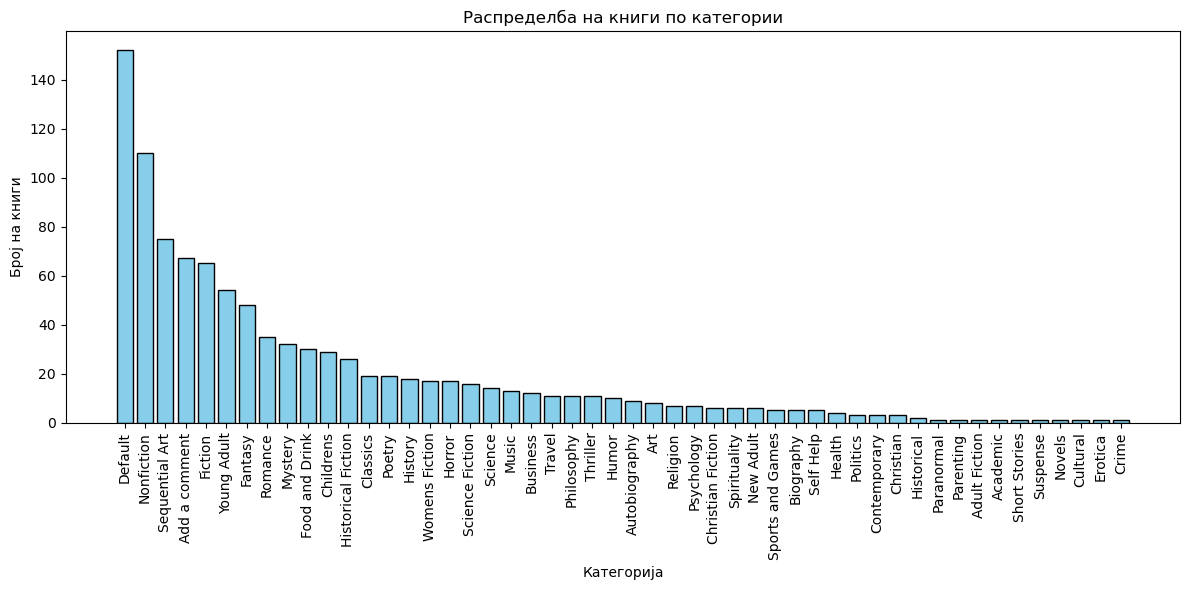

In [69]:
# 📚 Imports
import time
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# 1️⃣ Setup Selenium Chrome
options = Options()
options.add_argument("--headless=new")  # run headless, remove if you want visible browser
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 2️⃣ Navigate to main page and collect categories
base = "https://books.toscrape.com/"
driver.get(base)
time.sleep(1)

cat_elements = driver.find_elements(By.CSS_SELECTOR, ".side_categories ul li ul li a")
categories = []
for el in cat_elements:
    name = el.text.strip()
    link = el.get_attribute("href")
    categories.append({"Category": name, "Link": link})
print(f"Found {len(categories)} categories.")

# 3️⃣ For each category, follow pagination and count books
cat_counts = []
for cat in categories:
    cat_name = cat["Category"]
    cat_url = cat["Link"]
    print(f"Scraping category: {cat_name}")

    # Start at page 1
    page_num = 1
    total_books = 0
    while True:
        page_url = cat_url.replace("index.html", f"page-{page_num}.html") if page_num > 1 else cat_url
        driver.get(page_url)
        time.sleep(0.5)
        books = driver.find_elements(By.CSS_SELECTOR, "article.product_pod")
        count_this_page = len(books)
        total_books += count_this_page

        # Try to find “next” link
        try:
            next_btn = driver.find_element(By.CSS_SELECTOR, "li.next a")
            page_num += 1
        except:
            break

    print(f"  => {cat_name}: {total_books} books")
    cat_counts.append({"Category": cat_name, "BookCount": total_books})

# 4️⃣ Close driver
driver.quit()

# 5️⃣ Create DataFrame and visualize
df_cat = pd.DataFrame(cat_counts)
df_cat = df_cat.sort_values(by="BookCount", ascending=False).reset_index(drop=True)
print(df_cat)

plt.figure(figsize=(12,6))
plt.bar(df_cat["Category"], df_cat["BookCount"], color="skyblue", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Распределба на книги по категории")
plt.xlabel("Категорија")
plt.ylabel("Број на книги")
plt.tight_layout()
plt.show()
